**Ideal Received Signal with a delay**

In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import butter, lfilter

In [2]:
def compute_fft(s, sampling_rate, n = None, scale_amplitudes = True):
    '''Computes an FFT on signal s using numpy.fft.fft.
    
       Parameters:
        s (np.array): the signal
        sampling_rate (num): sampling rate
        n (integer): If n is smaller than the length of the input, the input is cropped. If n is 
            larger, the input is padded with zeros. If n is not given, the length of the input signal 
            is used (i.e., len(s))
        scale_amplitudes (boolean): If true, the spectrum amplitudes are scaled by 2/len(s)
    '''
    if n == None:
        n = len(s)
        
    fft_result = np.fft.fft(s, n)
    num_freq_bins = len(fft_result)
    fft_freqs = np.fft.fftfreq(num_freq_bins, d = 1 / sampling_rate)
    half_freq_bins = num_freq_bins // 2

    fft_freqs = fft_freqs[:half_freq_bins]
    fft_result = fft_result[:half_freq_bins]
    fft_amplitudes = np.abs(fft_result)
    
    if scale_amplitudes is True:
        fft_amplitudes = 2 * fft_amplitudes / (len(s))
    
    return (fft_freqs, fft_amplitudes)

In [3]:
def generateChirp(start, end, sr, dur, samples = None):
    '''
    Generates a chirp signal

    Parameters:
    start (float): start frequency of the chirp
    end (float): end frequency of the chirp
    sr (num): sampling rate
    dur (num):  time duration of tone
    '''
    if samples is None:
        samples = int(sr * dur)
    time = np.linspace(0, dur, samples, False)

    linear_chirp = librosa.chirp(fmin=start, fmax=end, sr = sr, length = samples, duration=dur, linear=True)  
    
    return linear_chirp

In [4]:
sampling_rate = 48000
dur = 10
no_of_reps = 10

'''distance = 1
v_sound =  343 
delay_duration = (2*distance)/343'''

delay_duration = 5

**Chirp Signal**
- frequency range = 18-20kHz
- chirp duration = 10s

In [5]:
chirp = generateChirp(18000,20000, sampling_rate, dur)

Text(0.5, 1.0, 'Chirp Signal (18-20kHz)')

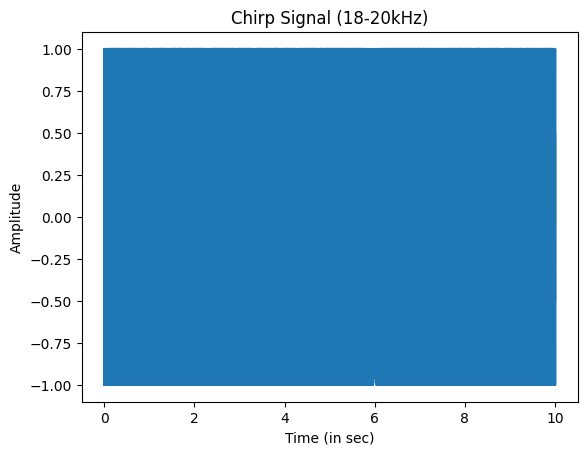

In [6]:
# Time vs Amplitude plot for the chirp 
plt.plot([i/sampling_rate for i in range(len(chirp))], chirp)
plt.xlabel("Time (in sec)")
plt.ylabel("Amplitude")
plt.title("Chirp Signal (18-20kHz)")

In [7]:
F_chirp, A_chirp = compute_fft(chirp, sampling_rate)

In [8]:
all_F_chirp = [F_chirp[np.where(A_chirp == np.sort(A_chirp)[::-1][i])] for i in range(10)]
print("Chirp Signal frequencies: ")
all_F_chirp

Chirp Signal frequencies: 


[array([18012.2]),
 array([19987.8]),
 array([18012.1]),
 array([19987.9]),
 array([18012.3]),
 array([19987.7]),
 array([18012.]),
 array([19988.]),
 array([18012.4]),
 array([19987.6])]

Resolution:  0.1


Text(0.5, 1.0, 'Chirp Signal Spectrum')

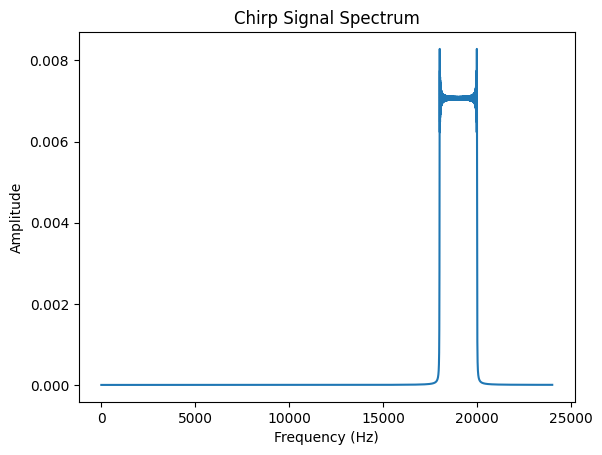

In [9]:
print("Resolution: ", 24000/len(F_chirp))

plt.plot(F_chirp, A_chirp)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Chirp Signal Spectrum')

**Delayed Chirp Signal**

In [10]:
silence = np.zeros(int(sampling_rate * delay_duration))

In [11]:
delayed_signal = np.concatenate((silence, chirp))

Text(0.5, 1.0, 'Delayed Chirp Signal (18-20kHz)')

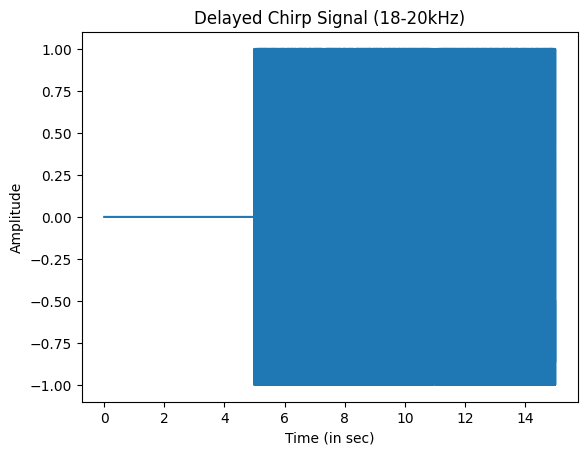

In [12]:
# Time vs Amplitude plot for the delayed chirp 
plt.plot([i/sampling_rate for i in range(len(delayed_signal))], delayed_signal)
plt.xlabel("Time (in sec)")
plt.ylabel("Amplitude")
plt.title("Delayed Chirp Signal (18-20kHz)")

In [13]:
F_chirp_delayed, A_chirp_delayed = compute_fft(delayed_signal, sampling_rate)

Resolution:  0.06666666666666667


Text(0.5, 1.0, 'Delayed Chirp Signal Spectrum')

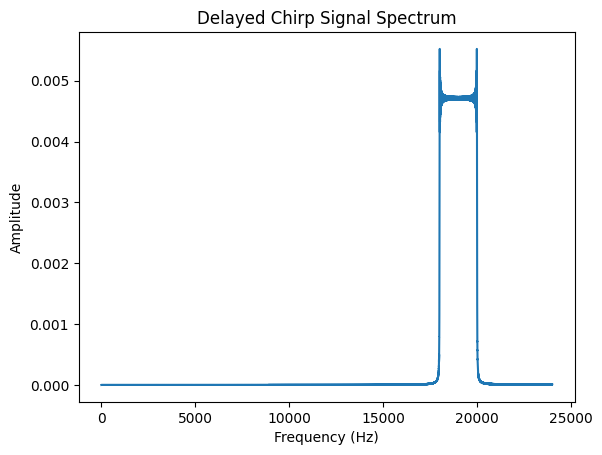

In [14]:
print("Resolution: ", 24000/len(F_chirp_delayed))

plt.plot(F_chirp_delayed, A_chirp_delayed)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Delayed Chirp Signal Spectrum')

**Repeated Delayed Chirp Signal**
- number of repetitions = 10 
- total signal duration = 150s

In [15]:
repeated_chirp = np.tile(delayed_signal, no_of_reps)

Text(0.5, 1.0, 'Repeated Delayed Chirp Signal (18-20kHz)')

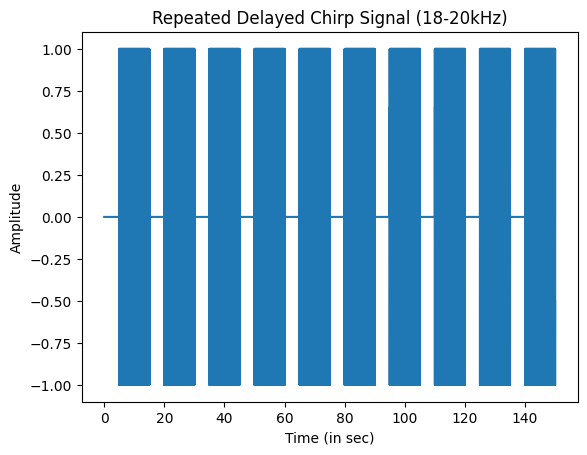

In [16]:
# Time vs Amplitude plot for the repeated chirp 
plt.plot([i/sampling_rate for i in range(len(repeated_chirp))], repeated_chirp)
plt.xlabel("Time (in sec)")
plt.ylabel("Amplitude")
plt.title("Repeated Delayed Chirp Signal (18-20kHz)")

In [17]:
F_chirp_rep, A_chirp_rep = compute_fft(repeated_chirp, sampling_rate)

In [18]:
all_F_chirp_rep = [F_chirp_rep[np.where(A_chirp_rep == np.sort(A_chirp_rep)[::-1][i])] for i in range(10)]
print("Repeated Chirp Signal frequencies: ")
all_F_chirp_rep

Repeated Chirp Signal frequencies: 


[array([18012.2]),
 array([19987.8]),
 array([18012.]),
 array([19988.]),
 array([18012.4]),
 array([19987.6]),
 array([18012.13333333]),
 array([18012.06666667]),
 array([18012.26666667]),
 array([18011.8])]

Resolution:  0.006666666666666667


Text(0.5, 1.0, 'Repeated Delayed Chirp Signal Spectrum')

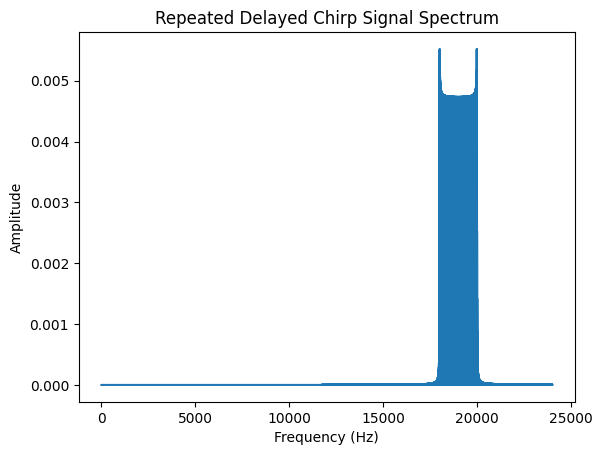

In [19]:
print("Resolution: ", 24000/len(F_chirp_rep))

plt.plot(F_chirp_rep, A_chirp_rep)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Repeated Delayed Chirp Signal Spectrum')

**Tone**
- frequency = 11.7Hz
- signal time duration = 10s

In [20]:
def generateAudio(freq, sr, dur, samples=None):
    '''
    Generates a tone (continuous wave)

    Parameters:
    freq (float): frequency of the tone
    sr (num): sampling rate
    dur (num): time duration of tone
    '''
    if samples == None:
        samples = int(sr * dur)
    time = np.linspace(0, dur, samples, False)

    tone = np.sin(2 * np.pi * freq * time)  
    return tone

In [21]:
tone = generateAudio(11.7, sampling_rate, dur)
#tone = generateAudio(11.7, sampling_rate, dur=1)

Text(0.5, 1.0, 'Tone of 11.7Hz')

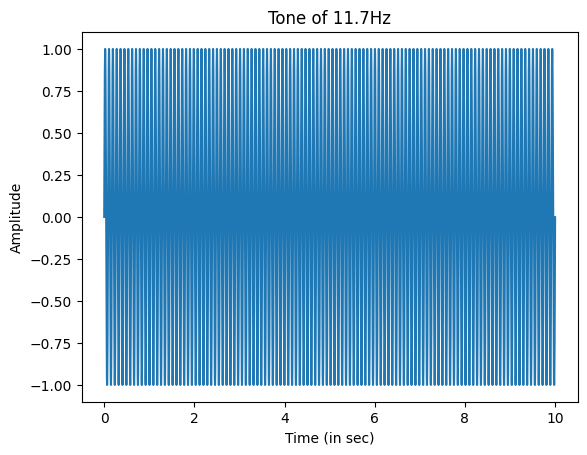

In [22]:
# Time vs Amplitude plot for the tone
plt.plot([i/sampling_rate for i in range(len(tone))], tone)
plt.xlabel("Time (in sec)")
plt.ylabel("Amplitude")
plt.title("Tone of 11.7Hz")

In [23]:
F_tone, A_tone = compute_fft(tone, sampling_rate)

In [24]:
all_F_tone = [F_tone[np.where(A_tone == np.sort(A_tone)[::-1][i])] for i in range(10)]
print("Tone frequencies: ")
all_F_tone

Tone frequencies: 


[array([11.7]),
 array([11.8]),
 array([11.6]),
 array([11.9]),
 array([11.5]),
 array([12.]),
 array([11.4]),
 array([12.1]),
 array([11.3]),
 array([12.2])]

Resolution:  0.1


Text(0.5, 1.0, 'Tone Spectrum')

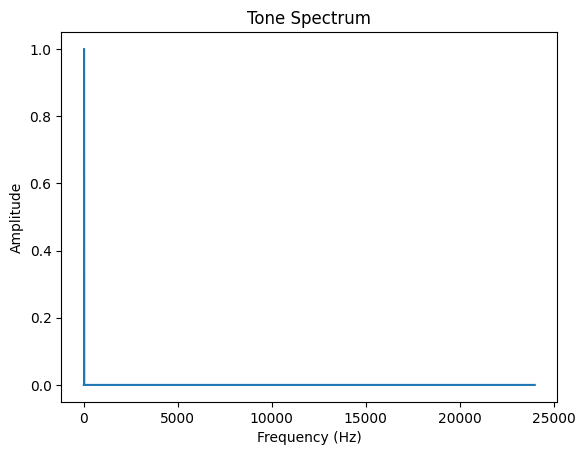

In [25]:
print("Resolution: ", 24000/len(F_tone))

plt.plot(F_tone, A_tone)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Tone Spectrum')

**Delayed Tone**

In [26]:
delayed_tone = np.concatenate((silence, tone))

Text(0.5, 1.0, 'Delayed Tone')

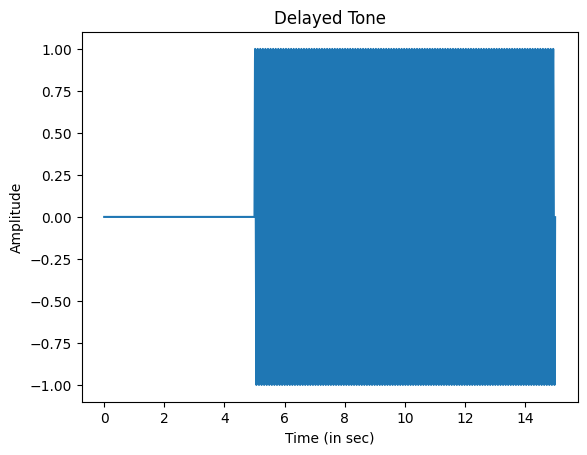

In [27]:
# Time vs Amplitude plot for the delayed chirp 
plt.plot([i/sampling_rate for i in range(len(delayed_tone))], delayed_tone)
plt.xlabel("Time (in sec)")
plt.ylabel("Amplitude")
plt.title("Delayed Tone")

In [28]:
F_tone_delayed, A_tone_delayed = compute_fft(delayed_tone, sampling_rate)

Resolution:  0.06666666666666667


Text(0.5, 1.0, 'Delayed Tone Spectrum')

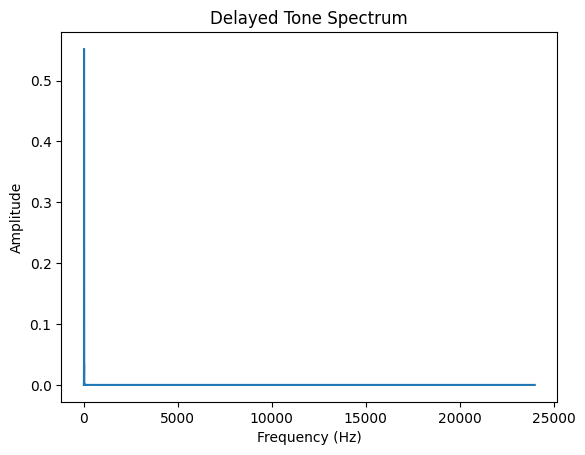

In [29]:
print("Resolution: ", 24000/len(F_chirp_delayed))

plt.plot(F_tone_delayed, A_tone_delayed)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Delayed Tone Spectrum')

**Repeated Tone**
- frequncey = 11.7Hz
- number of repetitions = 10
- total signal duration = 100s

In [30]:
repeated_tone = np.tile(delayed_tone, no_of_reps)

Text(0.5, 1.0, 'Repeated Delayed Tone of 11.7Hz')

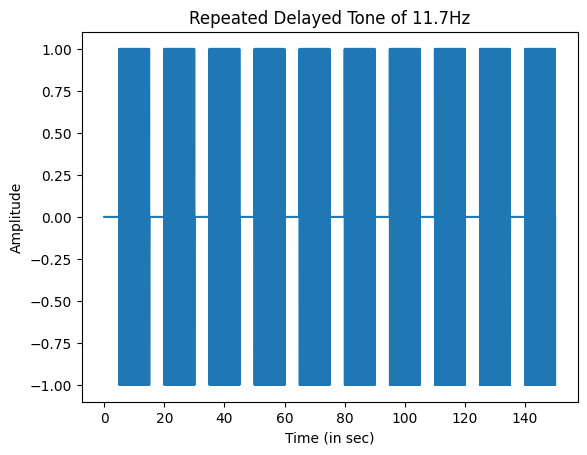

In [31]:
# Time vs Amplitude plot for the repeated tone 
plt.plot([i/sampling_rate for i in range(len(repeated_tone))], repeated_tone)
plt.xlabel("Time (in sec)")
plt.ylabel("Amplitude")
plt.title("Repeated Delayed Tone of 11.7Hz")

In [32]:
F_tone_rep, A_tone_rep = compute_fft(repeated_tone, sampling_rate)

In [33]:
all_F_tone_rep = [F_tone_rep[np.where(A_tone_rep == np.sort(A_tone_rep)[::-1][i])] for i in range(10)]
print("Repeated Delayed Tone frequencies: ")
all_F_tone_rep

Repeated Delayed Tone frequencies: 


[array([11.66666667]),
 array([11.73333333]),
 array([11.53333333]),
 array([11.86666667]),
 array([11.46666667]),
 array([11.93333333]),
 array([11.33333333]),
 array([12.06666667]),
 array([11.26666667]),
 array([12.13333333])]

Resolution:  0.006666666666666667


Text(0.5, 1.0, 'Repeated Delayed Tone Spectrum')

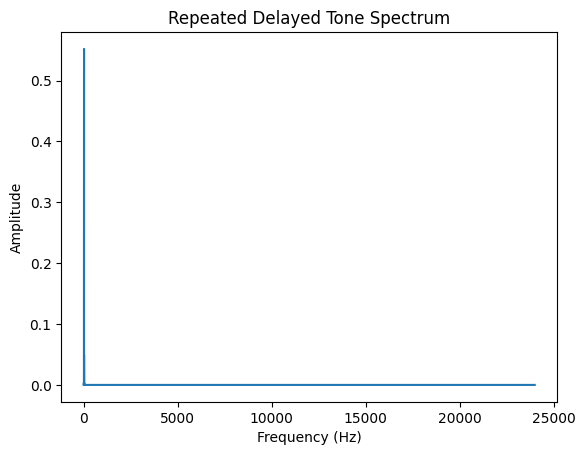

In [34]:
print("Resolution: ", 24000/len(F_tone_rep))
plt.plot(F_tone_rep, A_tone_rep)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Repeated Delayed Tone Spectrum')

**Mixed Signal**
- mixing the delayed chirp (18-20kHz) and the delayed tone (11.7Hz)

In [35]:
mixed_signal = delayed_signal + delayed_tone

Text(0.5, 1.0, 'Delayed Mixed Signal (Chirp and 11.7Hz tone)')

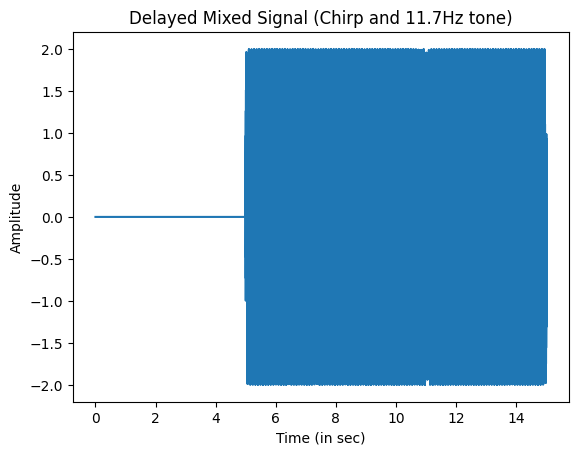

In [36]:
# Time vs Amplitude plot for the mixed signal 
plt.plot([i/sampling_rate for i in range(len(mixed_signal))], mixed_signal)
plt.xlabel("Time (in sec)")
plt.ylabel("Amplitude")
plt.title("Delayed Mixed Signal (Chirp and 11.7Hz tone)")

In [37]:
F_mixed, A_mixed = compute_fft(mixed_signal, sampling_rate)

In [56]:
all_F_mixed = [F_mixed[np.where(A_mixed == np.sort(A_mixed)[::-1][i])] for i in range(100)]
print("Delayed Mixed Signal frequencies: ")
all_F_mixed

Delayed Mixed Signal frequencies: 


[array([11.66666667]),
 array([11.73333333]),
 array([11.53333333]),
 array([11.86666667]),
 array([11.46666667]),
 array([11.93333333]),
 array([11.33333333]),
 array([12.06666667]),
 array([11.26666667]),
 array([12.13333333]),
 array([11.13333333]),
 array([12.26666667]),
 array([11.06666667]),
 array([12.33333333]),
 array([10.93333333]),
 array([12.46666667]),
 array([10.86666667]),
 array([12.53333333]),
 array([10.73333333]),
 array([10.66666667]),
 array([12.66666667]),
 array([12.73333333]),
 array([10.53333333]),
 array([10.46666667]),
 array([12.86666667]),
 array([10.33333333]),
 array([12.93333333]),
 array([10.26666667]),
 array([13.06666667]),
 array([10.13333333]),
 array([10.06666667]),
 array([13.13333333]),
 array([9.93333333]),
 array([13.26666667]),
 array([9.86666667]),
 array([13.33333333]),
 array([9.73333333]),
 array([9.66666667]),
 array([13.46666667]),
 array([9.53333333]),
 array([13.53333333]),
 array([9.46666667]),
 array([9.33333333]),
 array([13.6666666

Resolution:  0.06666666666666667


Text(0.5, 1.0, 'Delayed Mixed Signal Spectrum')

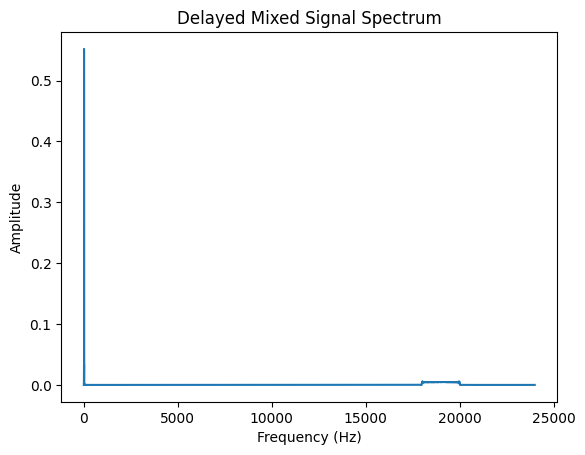

In [39]:
print("Resolution: ", 24000/len(F_mixed))

plt.plot(F_mixed, A_mixed)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Delayed Mixed Signal Spectrum')

**Repeated Mixed Signal**
- mixing the delayed chirp (18-20kHz) and the delayed tone (11.7Hz)
- number of repetitions = 10

In [40]:
repeated_mixed_signal = np.tile(mixed_signal, no_of_reps)

Text(0.5, 1.0, 'Repeated Delayed Mixed Signal (Chirp and 11.7Hz tone)')

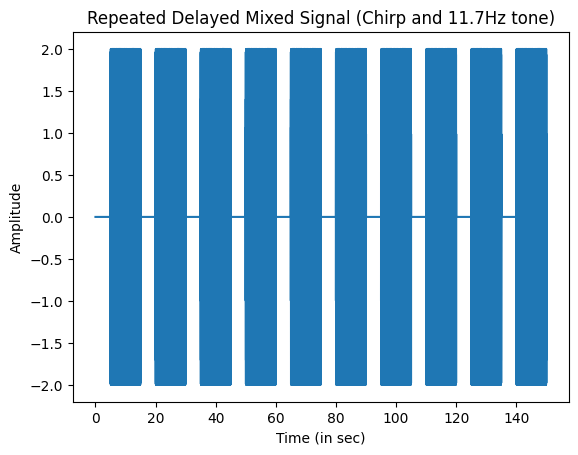

In [41]:
# Time vs Amplitude plot for the repeated tone 
plt.plot([i/sampling_rate for i in range(len(repeated_mixed_signal))], repeated_mixed_signal)
plt.xlabel("Time (in sec)")
plt.ylabel("Amplitude")
plt.title("Repeated Delayed Mixed Signal (Chirp and 11.7Hz tone)")

In [42]:
F_mixed_rep, A_mixed_rep = compute_fft(repeated_mixed_signal, sampling_rate)

In [57]:
all_F_mixed_rep = [F_mixed_rep[np.where(A_mixed_rep == np.sort(A_mixed_rep)[::-1][i])] for i in range(100)]
print("Repeated Delayed Mixed Signal frequencies: ")
all_F_mixed_rep

Repeated Delayed Mixed Signal frequencies: 


[array([11.66666667]),
 array([11.73333333]),
 array([11.53333333]),
 array([11.86666667]),
 array([11.46666667]),
 array([11.93333333]),
 array([11.33333333]),
 array([12.06666667]),
 array([11.26666667]),
 array([12.13333333]),
 array([11.13333333]),
 array([12.26666667]),
 array([11.06666667]),
 array([12.33333333]),
 array([10.93333333]),
 array([12.46666667]),
 array([10.86666667]),
 array([12.53333333]),
 array([10.73333333]),
 array([10.66666667]),
 array([12.66666667]),
 array([12.73333333]),
 array([10.53333333]),
 array([10.46666667]),
 array([12.86666667]),
 array([10.33333333]),
 array([12.93333333]),
 array([10.26666667]),
 array([13.06666667]),
 array([10.13333333]),
 array([10.06666667]),
 array([13.13333333]),
 array([9.93333333]),
 array([13.26666667]),
 array([9.86666667]),
 array([13.33333333]),
 array([9.73333333]),
 array([9.66666667]),
 array([13.46666667]),
 array([9.53333333]),
 array([13.53333333]),
 array([9.46666667]),
 array([9.33333333]),
 array([13.6666666

Resolution:  0.006666666666666667


Text(0.5, 1.0, 'Repeated Delayed Mixed Signal Spectrum')

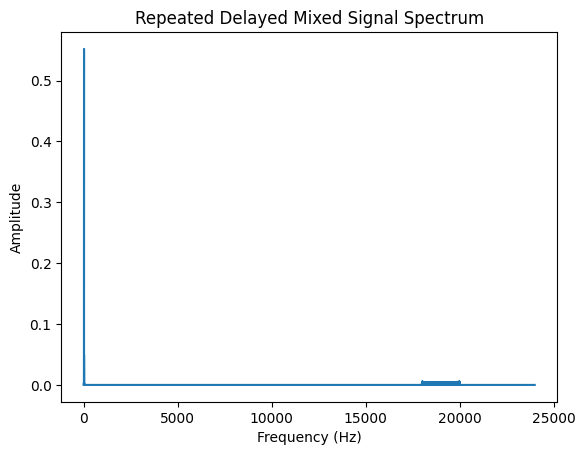

In [44]:
print("Resolution: ", 24000/len(F_mixed_rep))

plt.plot(F_mixed_rep, A_mixed_rep)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Repeated Delayed Mixed Signal Spectrum')

**Filtered Signal**
- applying a lowpasss filter with a cutoff frequency of 20Hz, on the repeated delayed mixed signal 

In [45]:
def butter_lowpass_filter(data, cutoff, fs, order=5):

    '''
    Applies a lowpass Butterworth filter to the input signal and returns the filtered signal.

    Parameters:
    data (np.array): The signal to be filtered
    cutoff (float): The cutoff frequency for the lowpass filter
    fs (float): The sampling rate of the signal
    order (int): The order of the Butterworth filter. Default is 5
    '''
    
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = lfilter(b, a, data)
    return y

In [46]:
cutoff = 20

In [47]:
filtered_signal = butter_lowpass_filter(repeated_mixed_signal, cutoff, sampling_rate, order = 5)

In [48]:
F_filtered, A_filtered = compute_fft(filtered_signal, sampling_rate)

all_F_filtered = [F_filtered[np.where(A_filtered == np.sort(A_filtered)[::-1][i])] for i in range(10)]
print("Repeated Delayed Mixed Signal frequencies: ")
all_F_filtered


Repeated Delayed Mixed Signal frequencies: 


[array([11.66666667]),
 array([11.73333333]),
 array([11.53333333]),
 array([11.86666667]),
 array([11.46666667]),
 array([11.93333333]),
 array([11.33333333]),
 array([12.06666667]),
 array([11.26666667]),
 array([12.13333333])]

Resolution:  0.006666666666666667


(5.0, 20.0)

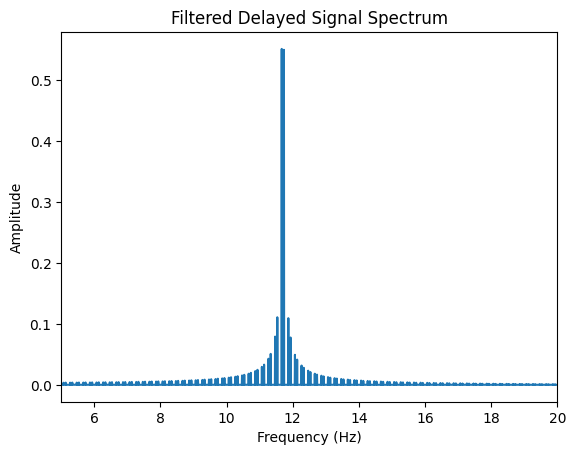

In [49]:
print("Resolution: ", 24000/len(F_filtered))

plt.plot(F_filtered, A_filtered)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Filtered Delayed Signal Spectrum')
plt.xlim(5,20)